In [30]:
# import libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns 

In [31]:
# Load the data from csv file
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')



In [32]:
# check the data 
print("Training data shape:", df.shape)
print("Test data shape:", df_test.shape)
print(df.head())

Training data shape: (1460, 81)
Test data shape: (1459, 80)
   Id  MSSubClass MSZoning  LotFrontage  Lotrea Street Alley LotShape  \
0   1          60       RL         65.0    8450   Pave   NaN      Reg   
1   2          20       RL         80.0    9600   Pave   NaN      Reg   
2   3          60       RL         68.0   11250   Pave   NaN      IR1   
3   4          70       RL         60.0    9550   Pave   NaN      IR1   
4   5          60       RL         84.0   14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  Sale

In [33]:
df.describe()


,Id,MSSubClass,LotFrontage,Lotrea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [34]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


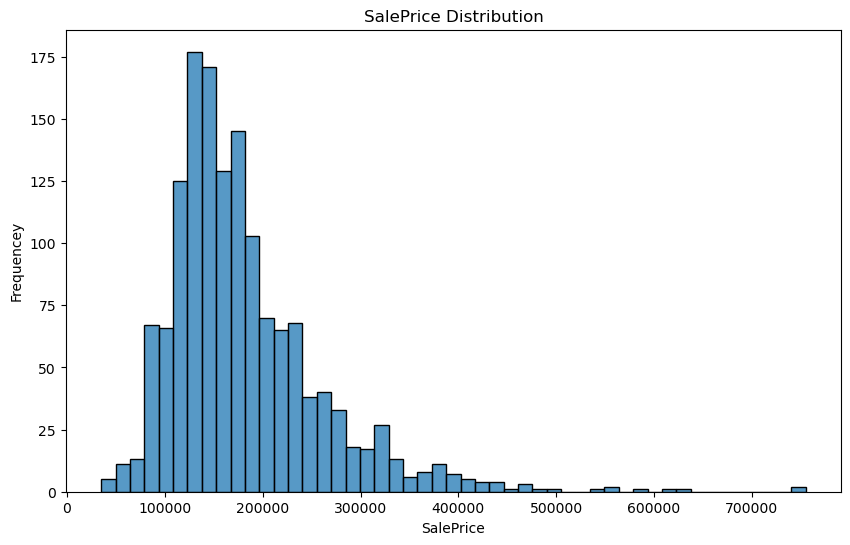

In [35]:
# first Data Plotting for SalePrice Distribution

plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'])
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel("Frequencey")
plt.show()



In [36]:
# Check for missing values in training data
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values in training data:\n", missing_values[missing_values > 0])

# Check for missing values in test data
missing_values_test = df_test.isnull().sum().sort_values(ascending=False)
print("Missing values in test data:\n", missing_values_test[missing_values_test > 0])


Missing values in training data:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64
Missing values in test data:
 PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1

In [37]:
threshold = 0.5 * len(df)

# Identifies columns where the count of missing values exceeds the 50%
columns_to_drop = df.columns[df.isnull().sum() > threshold]

# drop columns with more than 50 % missing values in training data
df = df.drop(columns=columns_to_drop)

# drop columns with more than 50 % missing values in test data
df_test = df_test.drop(columns=columns_to_drop, errors='ignore') 

# Fill missing values for remaining columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':  # Check if the column is categorical
            mode_value = df[col].mode()[0] # Get the most frequent value
            df[col] = df[col].fillna(mode_value) # Fill missing values with the most frequent value 
            if col in df_test.columns:
                df_test[col] = df_test[col].fillna(mode_value)
        else:  
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)
            if col in df_test.columns:
                df_test[col] = df_test[col].fillna(median_value)

# Verify that all missing values have been handled
print("Remaining missing values in training data:\n", df.isnull().sum().sort_values(ascending=False))
print("\nRemaining missing values in test data:\n", df_test.isnull().sum().sort_values(ascending=False))

Remaining missing values in training data:
 Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
Exterior2nd    0
Exterior1st    0
RoofMatl       0
SalePrice      0
Length: 76, dtype: int64

Remaining missing values in test data:
 MSZoning         4
Functional       2
BsmtFullBath     2
BsmtHalfBath     2
Utilities        2
                ..
BsmtFinType2     0
MSSubClass       0
HeatingQC        0
CentralAir       0
SaleCondition    0
Length: 75, dtype: int64


In [38]:
# Total sqaure footage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']


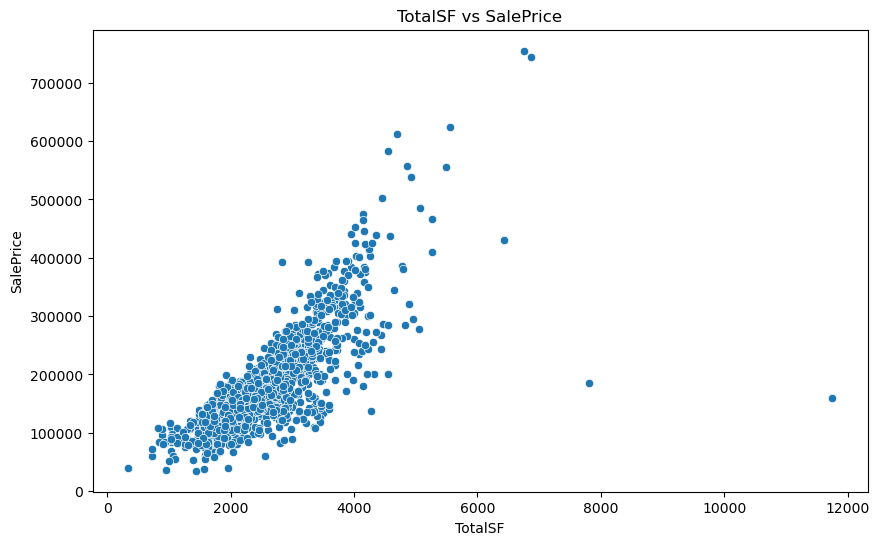

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalSF', y='SalePrice')
plt.title("TotalSF vs SalePrice")
plt.xlabel("TotalSF")
plt.ylabel("SalePrice")
plt.show()

In [40]:
df_encoded = pd.get_dummies(df.drop(columns=['SalePrice']))
df_test_encoded = pd.get_dummies(df_test)
df_encoded, df_test_encoded = df_encoded.align(df_test_encoded, join='inner', axis=1)
df_encoded['SalePrice'] = df['SalePrice']



In [41]:
# Separate target variable and features
X = df_encoded.drop(['SalePrice'], axis=1)
y = df_encoded['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model performance on the validation set
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE with Linear Regression:", rmse)

# Ensure no missing values in test data before making predictions
for col in df_test_encoded.columns:
    if df_test_encoded[col].isnull().sum() > 0:
        if df_test_encoded[col].dtype == 'object':
            df_test_encoded[col].fillna(df_test_encoded[col].mode()[0], inplace=True)
        else:
            df_test_encoded[col].fillna(df_test_encoded[col].median(), inplace=True)

#  Predict on test data and create submission
test_predictions = model.predict(df_test_encoded)


Validation RMSE with Linear Regression: 32387.519180685544


C:\Users\da980\AppData\Local\Temp\ipykernel_17052\879283776.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_encoded[col].fillna(df_test_encoded[col].median(), inplace=True)


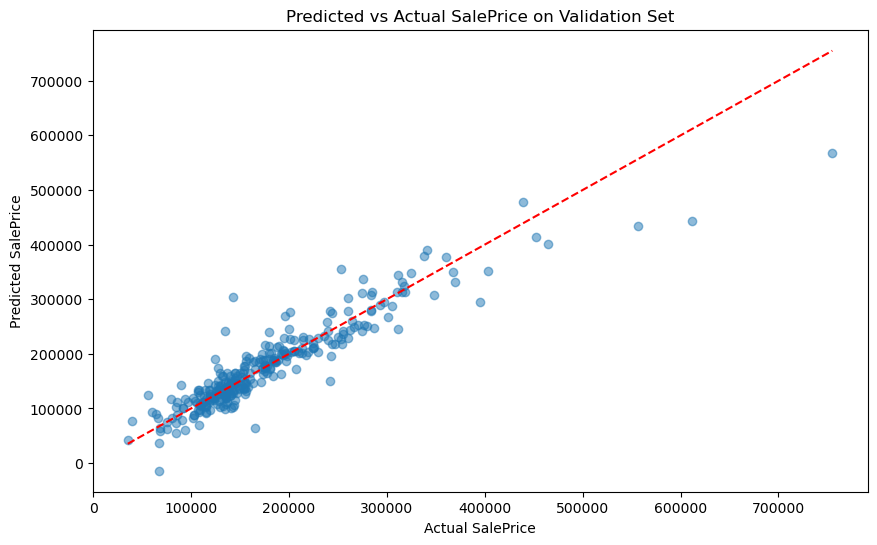

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice on Validation Set")
plt.show()

In [43]:


# Make Submission file
submission = pd.DataFrame({
    'Id': df_test['Id'], 
    'SalePrice': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")


Submission file created successfully.
